In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
filepath = r'C:\Users\SHREEANSH\Downloads\Datascience course\Projects\Covid\Covid Data.csv\Covid Data.csv'


In [21]:
df = pd.read_csv(filepath)
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [9]:
# Show basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nPreview:\n", df.head())


Shape of dataset: (1048575, 21)

Column names:
 ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED', 'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU']

Preview:
    USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [13]:
# Check for nulls
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


In [19]:
# Check class distribution (assuming 'DEATH' is the target)
if 'CLASIFFICATION_FINAL' in df.columns:
    print("\nTarget Distribution:\n", df['CLASIFFICATION_FINAL'].value_counts(normalize=True))


Target Distribution:
 CLASIFFICATION_FINAL
7    0.476122
3    0.363853
6    0.122197
5    0.024882
1    0.008203
4    0.002977
2    0.001765
Name: proportion, dtype: float64


In [23]:
# Create binary target from DATE_DIED
df['DEATH'] = df['DATE_DIED'].apply(lambda x: 0 if x == '9999-99-99' or pd.isna(x) else 1)


In [159]:
# Keeps only confirmed covid cases in the dataset whose values are between 1-3
df = df[df['CLASIFFICATION_FINAL'].isin([1,2,3])]
df

KeyError: 'CLASIFFICATION_FINAL'

In [161]:
# 3. Drop unnecessary columns
# DATE_DIED was used to create target
# CLASIFFICATION_FINAL was used to filter
# -------------------------------
df.drop(columns=['DATE_DIED', 'CLASIFFICATION_FINAL'], inplace=True)
df

KeyError: "['DATE_DIED', 'CLASIFFICATION_FINAL'] not found in axis"

In [53]:
bool_cols = ['PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
             'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
             'TOBACCO', 'INTUBED', 'PNEUMONIA', 'ICU']

In [163]:
# -------------------------------
# 4. Clean binary categorical columns
# Replace 97/98/99 (unknowns) with NaN
# Convert to 1 = Yes, 0 = No
# -------------------------------

invalid_values = [97, 98, 99]
for col in bool_cols:
    df[col] = df[col].replace(invalid_values, np.nan)
    df[col] = df[col].replace({1:1, 2:0})

df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DEATH
0,2,1,1,1,NaN,1.0,65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1
2,2,1,0,2,1.0,0.0,55,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2,1,0,1,NaN,0.0,68,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1
5,2,1,1,2,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,2,1,1,1,NaN,0.0,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,2,0.0,0.0,77,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1047934,1,13,1,1,NaN,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1047935,1,13,0,1,NaN,0.0,70,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1047936,2,13,0,1,NaN,0.0,32,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


In [169]:
# 5. Convert SEX: 1 = female, 0 = male
# -------------------------------
df['SEX'] = df['SEX'].replace({1: 1, 2: 0})
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DEATH
0,2,1,1,1,NaN,1.0,65,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1
2,2,1,0,2,1.0,0.0,55,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2,1,0,1,NaN,0.0,68,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1
5,2,1,1,2,0.0,1.0,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,2,1,1,1,NaN,0.0,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,2,0.0,0.0,77,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1047934,1,13,1,1,NaN,0.0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1047935,1,13,0,1,NaN,0.0,70,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0
1047936,2,13,0,1,NaN,0.0,32,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0


In [171]:
# 6. Print summary
# -------------------------------
print("Cleaned shape:", df.shape)
print("\nTarget distribution (DEATH):")
print(df['DEATH'].value_counts(normalize=True))

Cleaned shape: (391979, 20)

Target distribution (DEATH):
DEATH
0    0.861635
1    0.138365
Name: proportion, dtype: float64


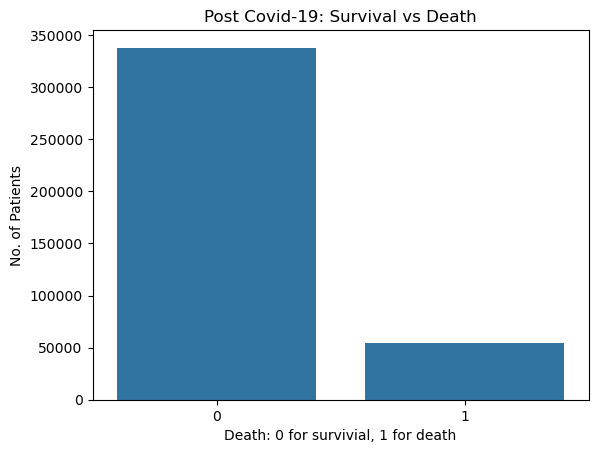

In [173]:
import seaborn as sns
sns.countplot(x='DEATH', data=df)

plt.title('Post Covid-19: Survival vs Death')
plt.xlabel('Death: 0 for survivial, 1 for death')
plt.ylabel('No. of Patients')
plt.show()

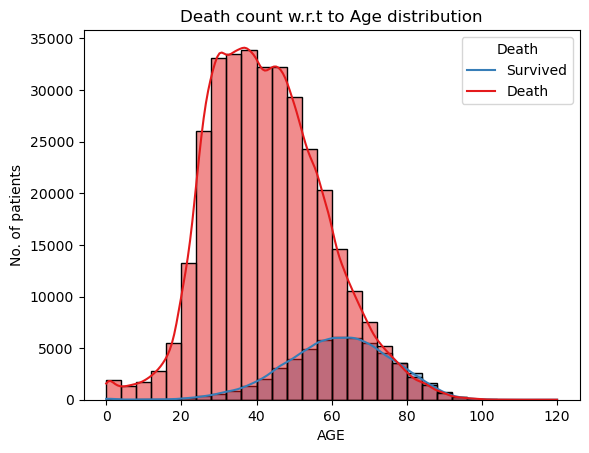

In [175]:
#Age distribution vs survival
sns.histplot(data=df, x='AGE', hue='DEATH', bins=30, kde=True, palette='Set1')
plt.title("Death count w.r.t to Age distribution")
plt.ylabel("No. of patients")
plt.legend(title='Death', labels=['Survived', 'Death'])
plt.show()

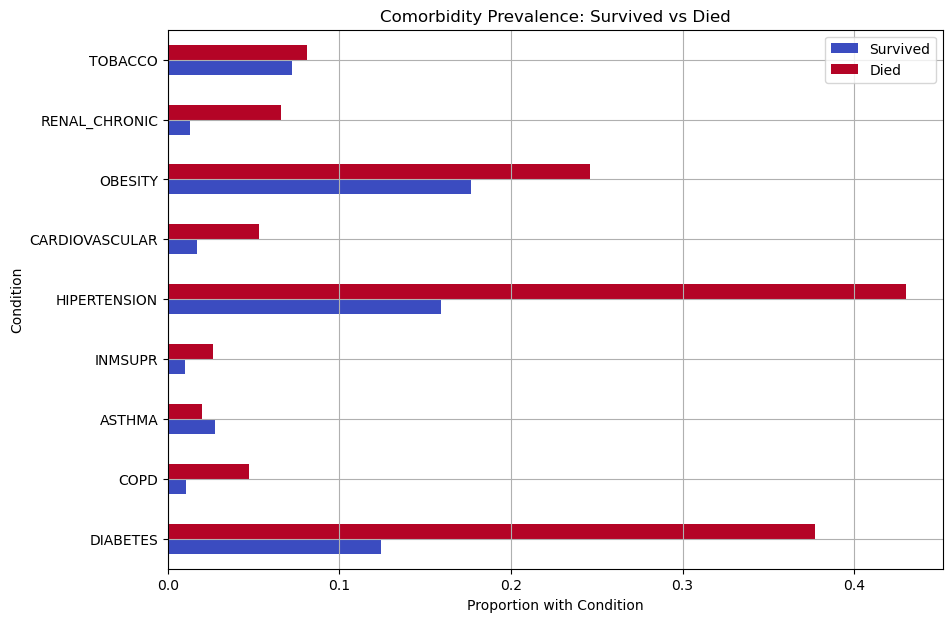

In [177]:
#comorbidity rates by outcome
comorb_cols = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
               'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']

comorb_summary = df.groupby('DEATH')[comorb_cols].mean().T

comorb_summary.plot(kind='barh', figsize=(10, 7), colormap='coolwarm')
plt.title('Comorbidity Prevalence: Survived vs Died')
plt.xlabel('Proportion with Condition')
plt.ylabel('Condition')
plt.legend(['Survived', 'Died'])
plt.grid(True)
plt.show()


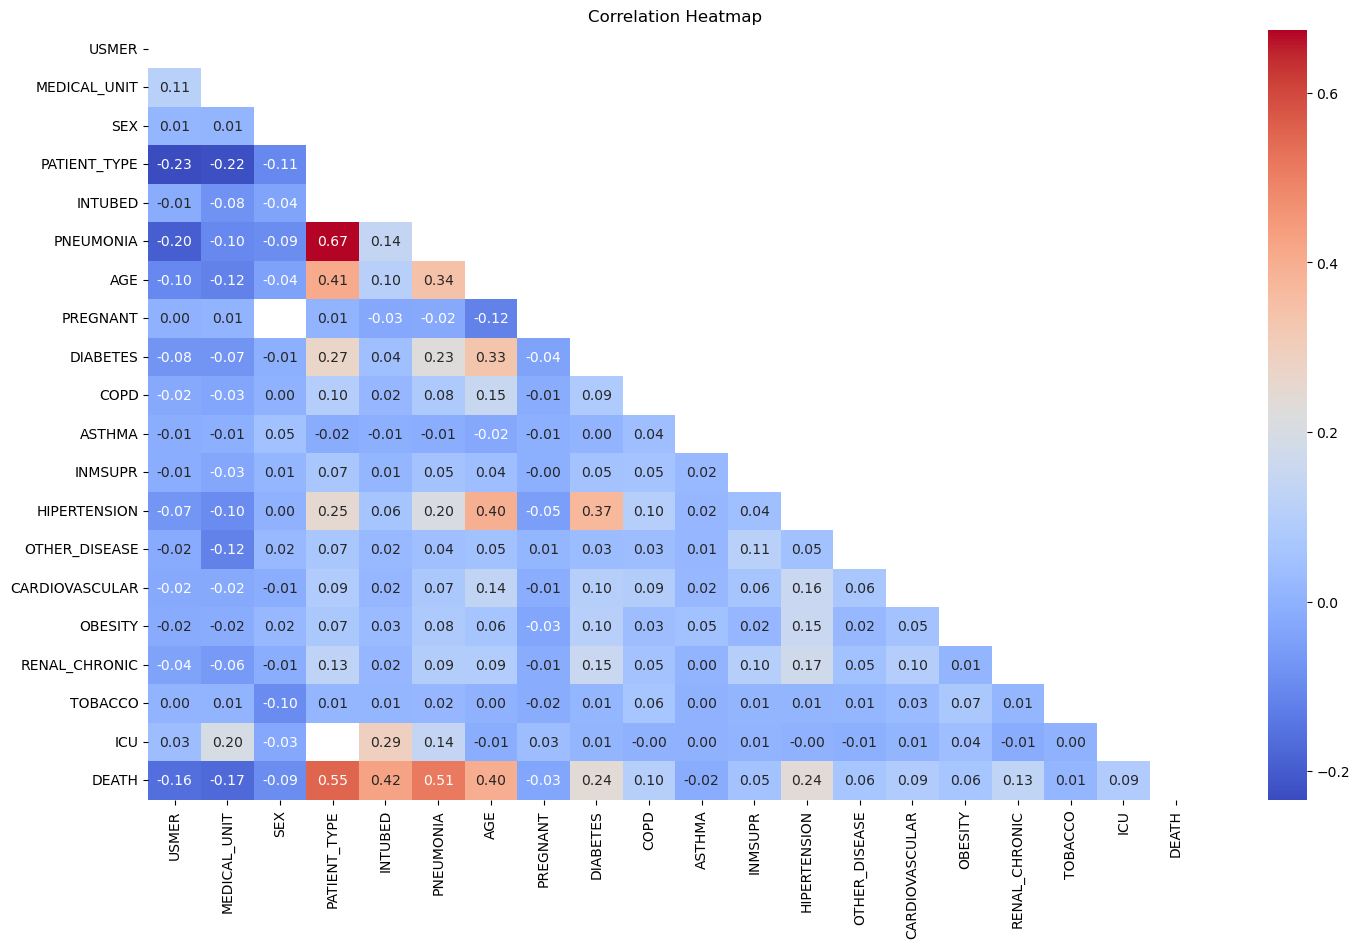

In [181]:

plt.figure(figsize=(17, 10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', mask=np.triu(corr))
plt.title("Correlation Heatmap")
plt.show()

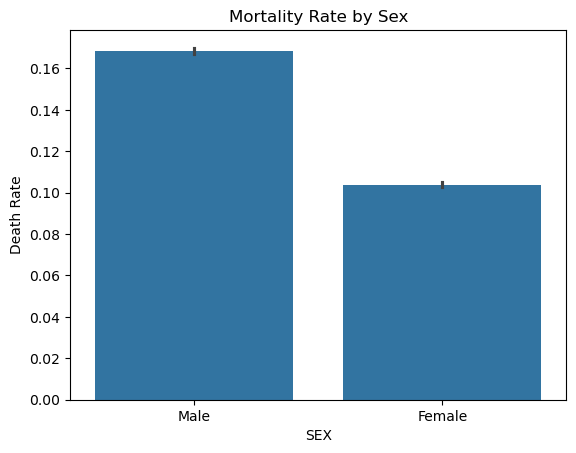

PREGNANT
0    178353
1      2754
Name: count, dtype: int64


In [145]:
sns.barplot(x='SEX', y='DEATH', data=df)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Mortality Rate by Sex')
plt.ylabel('Death Rate')
plt.show()

print(df['PREGNANT'].value_counts())


In [155]:


# Fix ambiguous NA issues
df = df.replace({pd.NA: np.nan})
eda_df = df.dropna()  # Safe for EDA

C:\Users\SHREEANSH\AppData\Local\Temp\ipykernel_31268\4087103132.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({pd.NA: np.nan})


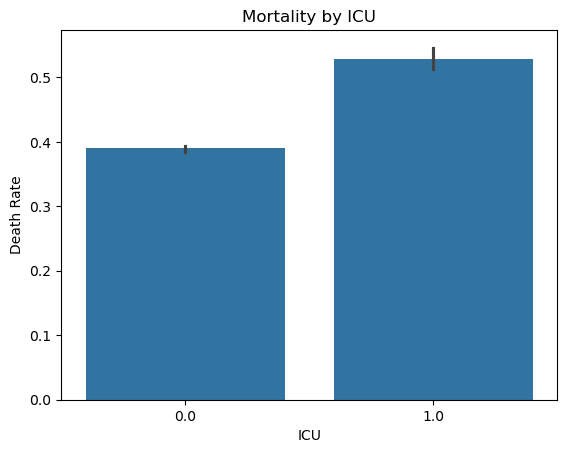

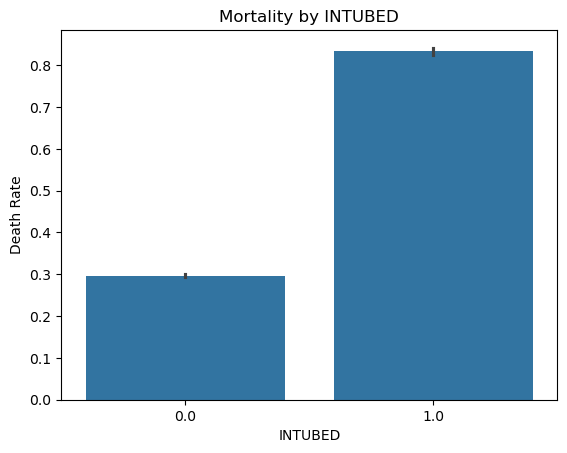

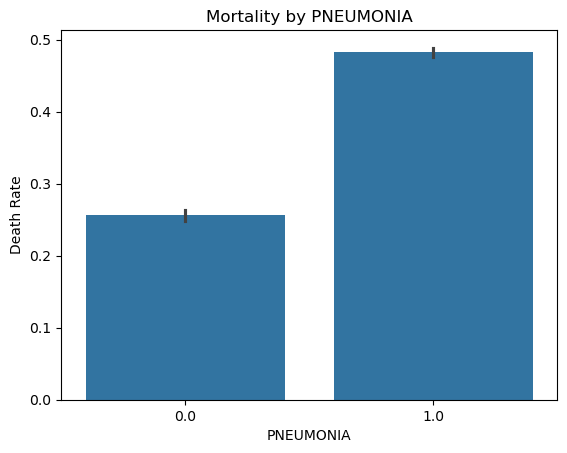

In [165]:
icu_related = ['ICU', 'INTUBED', 'PNEUMONIA']
for col in icu_related:
    sns.barplot(x=col, y='DEATH', data=eda_df)
    plt.title(f'Mortality by {col}')
    plt.ylabel('Death Rate')
    plt.show()

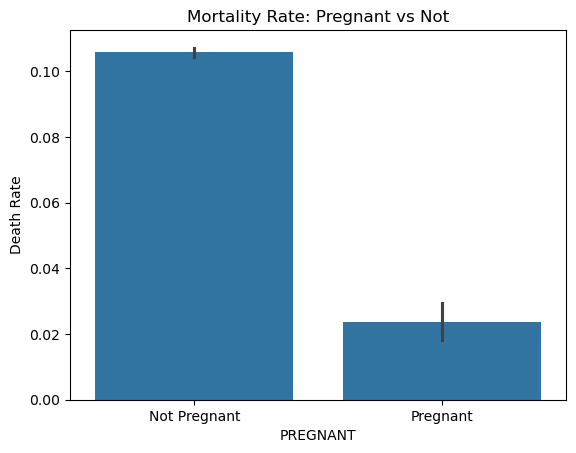

In [167]:

if 'PREGNANT' in df.columns:
    sns.barplot(x='PREGNANT', y='DEATH', data=df)
    plt.xticks([0, 1], ['Not Pregnant', 'Pregnant'])
    plt.title('Mortality Rate: Pregnant vs Not')
    plt.ylabel('Death Rate')
    plt.show()

In [185]:
#drop leakage features
leak = ['ICU', 'INTUBED']
df.drop(columns=leak, inplace=True)

KeyError: "['ICU', 'INTUBED'] not found in axis"

In [195]:
from sklearn.impute import SimpleImputer

# Boolean columns (should be 0/1)
bool_cols = ['PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
             'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR',
             'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'PNEUMONIA']

imputer = SimpleImputer(strategy='most_frequent')
df[bool_cols] = imputer.fit_transform(df[bool_cols])


In [199]:
#standarizing age
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['AGE'] = scaler.fit_transform(df[['AGE']])
df

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,DEATH
0,2,1,1,1,1.0,1.203624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,2,1,0,2,0.0,0.596126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2,1,0,1,0.0,1.385874,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
5,2,1,1,2,1.0,-0.315120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,2,1,1,1,0.0,1.142874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,13,1,2,0.0,1.932622,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1047934,1,13,1,1,0.0,0.596126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1047935,1,13,0,1,0.0,1.507373,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1047936,2,13,0,1,0.0,-0.801119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [201]:
df = pd.get_dummies(df, columns=['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE'], drop_first=True)
df

,SEX,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,...,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,PATIENT_TYPE_2
0,1,1.0,1.203624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0,0.0,0.596126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
4,0,0.0,1.385874,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,False
5,1,1.0,-0.315120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,True
6,1,0.0,1.142874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047933,1,0.0,1.932622,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,True
1047934,1,0.0,0.596126,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1047935,0,0.0,1.507373,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1047936,0,0.0,-0.801119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False


In [207]:
#splitting columns
X = df.drop(columns=['DEATH'])  # features
y = df['DEATH']                 # target


In [211]:
#train test split
from sklearn.model_selection import train_test_split

# Assuming your data is in X, y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [215]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Initialize model with class_weight
clf = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]

In [217]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Confusion Matrix:
[[57326 10223]
 [  982  9865]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91     67549
           1       0.49      0.91      0.64     10847

    accuracy                           0.86     78396
   macro avg       0.74      0.88      0.77     78396
weighted avg       0.92      0.86      0.87     78396

ROC AUC Score: 0.9364564526611437


In [219]:
pip install xgboost imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [221]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [223]:
smote = SMOTE(random_state=42)

In [227]:
rf_pipeline = ImbPipeline([
    ('smote', smote),
    ('rf', RandomForestClassifier(random_state=42))
])
rf_params = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [10, 20, None],
    'rf__min_samples_split': [2, 5],
    'rf__class_weight': [None, 'balanced']
}


In [229]:
xgb_pipeline = ImbPipeline([
    ('smote', smote),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

In [231]:
xgb_params = {
    'xgb__n_estimators': [100, 200],
    'xgb__max_depth': [3, 6, 10],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__scale_pos_weight': [1, (sum(y_train == 0) / sum(y_train == 1))]  # adjust for imbalance
}

In [233]:
#gridsearhcv
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rf_grid = GridSearchCV(rf_pipeline, rf_params, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)
xgb_grid = GridSearchCV(xgb_pipeline, xgb_params, scoring='roc_auc', cv=cv, n_jobs=-1, verbose=1)

In [235]:
# -- Step 5: Fit Models
print("Training Random Forest...")
rf_grid.fit(X_train, y_train)

print("Training XGBoost...")
xgb_grid.fit(X_train, y_train)

Training Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Training XGBoost...
Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\SHREEANSH\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:55:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric='logloss',...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1],
                         'xgb__max_depth': [3, 6, 10],
                         'xgb__n_estimators': [100, 200],
                         'xgb__scale_pos_weight': [1, 6.22724653714075]},
             scoring='roc_auc', verbose=1)

In [236]:
# -- Step 6: Evaluate
for model_name, model in zip(['Random Forest', 'XGBoost'], [rf_grid, xgb_grid]):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n--- {model_name} ---")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))
    print("Best Params:", model.best_params_)


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     67549
           1       0.47      0.94      0.62     10847

    accuracy                           0.84     78396
   macro avg       0.73      0.89      0.76     78396
weighted avg       0.92      0.84      0.86     78396

ROC AUC: 0.9371210075127705
Best Params: {'rf__class_weight': None, 'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.99      0.83      0.90     67549
           1       0.47      0.94      0.63     10847

    accuracy                           0.85     78396
   macro avg       0.73      0.89      0.77     78396
weighted avg       0.92      0.85      0.87     78396

ROC AUC: 0.9375103536864394
Best Params: {'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__scale_pos_weight': 1}


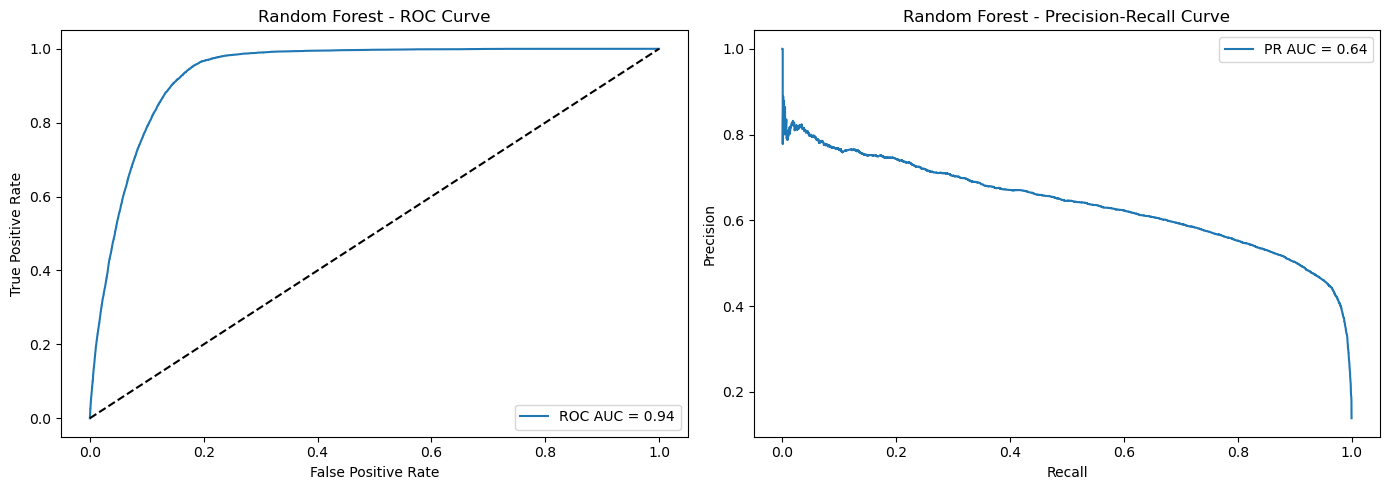

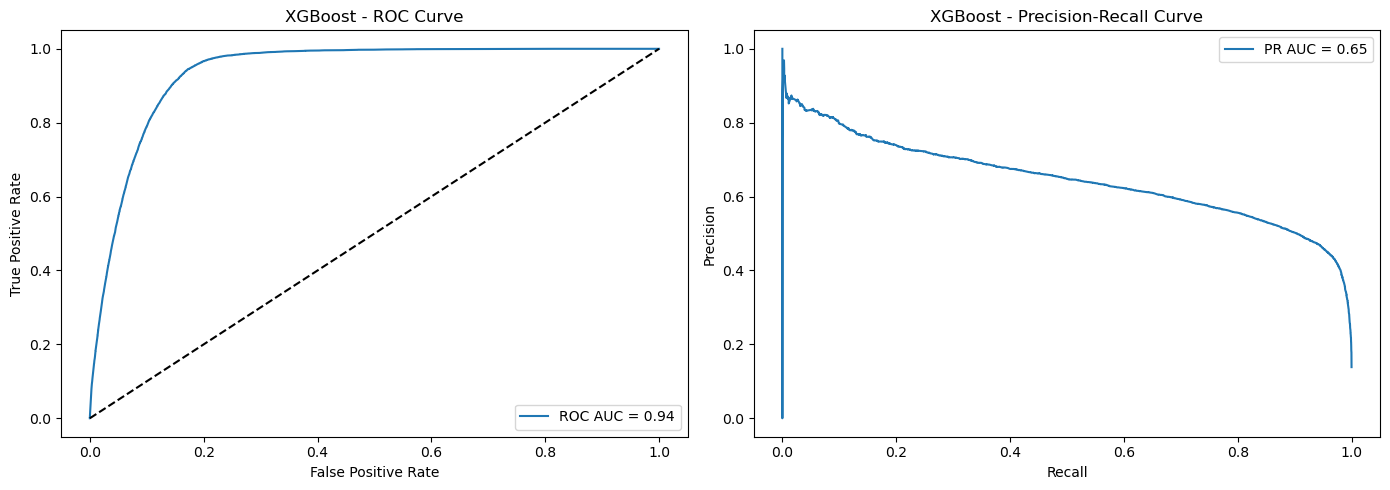

In [239]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

def plot_curves(y_test, y_proba, title='Model'):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    ax[0].plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
    ax[0].plot([0, 1], [0, 1], 'k--')
    ax[0].set_title(f'{title} - ROC Curve')
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].legend()

    ax[1].plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
    ax[1].set_title(f'{title} - Precision-Recall Curve')
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Call it
plot_curves(y_test, rf_grid.predict_proba(X_test)[:, 1], title='Random Forest')
plot_curves(y_test, xgb_grid.predict_proba(X_test)[:, 1], title='XGBoost')


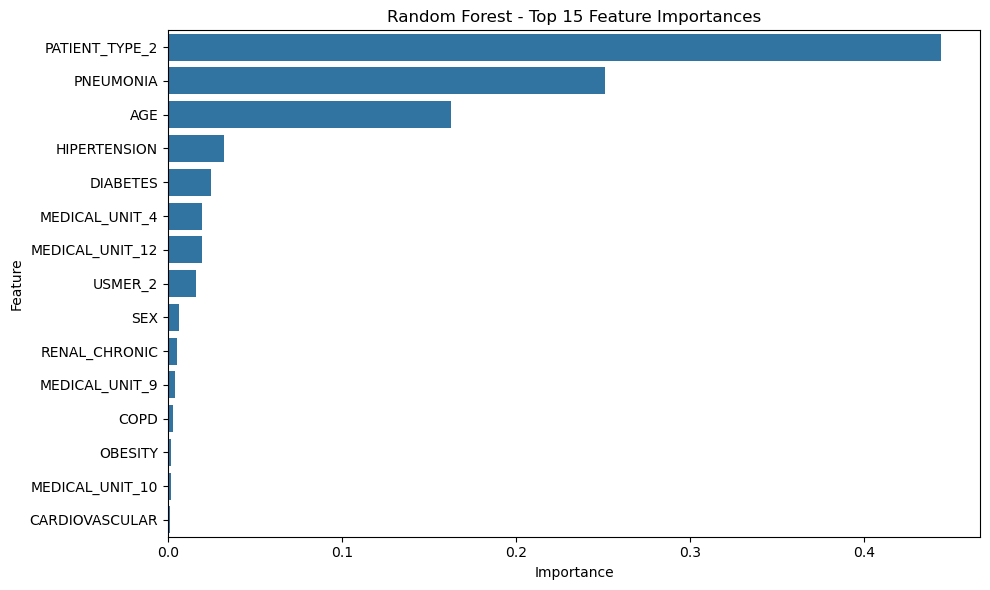

In [241]:
rf_importances = rf_grid.best_estimator_.named_steps['rf'].feature_importances_
feat_names = X.columns

rf_df = pd.DataFrame({'Feature': feat_names, 'Importance': rf_importances})
rf_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=rf_df.head(15), x='Importance', y='Feature')
plt.title('Random Forest - Top 15 Feature Importances')
plt.tight_layout()
plt.show()

In [243]:
pip install shap


   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [253]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313583 entries, 89537 to 351765
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SEX              313583 non-null  int64  
 1   PNEUMONIA        313583 non-null  float64
 2   AGE              313583 non-null  float64
 3   PREGNANT         313583 non-null  float64
 4   DIABETES         313583 non-null  float64
 5   COPD             313583 non-null  float64
 6   ASTHMA           313583 non-null  float64
 7   INMSUPR          313583 non-null  float64
 8   HIPERTENSION     313583 non-null  float64
 9   OTHER_DISEASE    313583 non-null  float64
 10  CARDIOVASCULAR   313583 non-null  float64
 11  OBESITY          313583 non-null  float64
 12  RENAL_CHRONIC    313583 non-null  float64
 13  TOBACCO          313583 non-null  float64
 14  USMER_2          313583 non-null  bool   
 15  MEDICAL_UNIT_2   313583 non-null  bool   
 16  MEDICAL_UNIT_3   313583 non-null  bool 

In [255]:
X_train = X_train.astype({col: 'float' for col in X_train.select_dtypes('bool').columns})
X_test = X_test.astype({col: 'float' for col in X_test.select_dtypes('bool').columns})


100%|===================| 313262/313583 [04:38<00:00]        

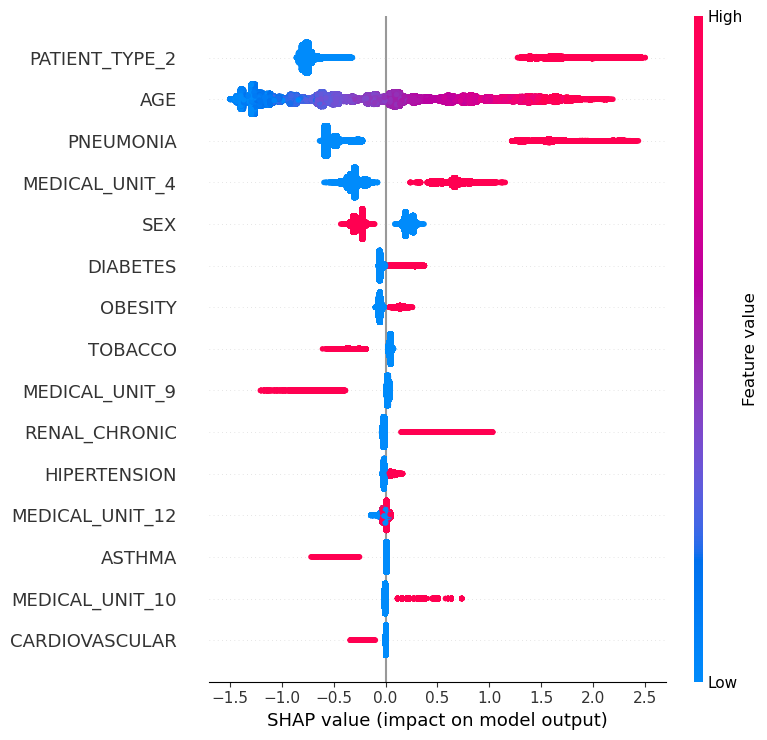

In [257]:
import shap

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, max_display=15)
